In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [2]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda = 'REIT';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [3]:
start = datetime(2020,1,1)
ativos

['O', 'NNN', 'AAPL', 'KO', 'TSLA', 'FB', 'PFE', 'DLR', 'FRO']

In [4]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [5]:
acoes.tail(12)

,O,NNN,AAPL,KO,TSLA,FB,PFE,DLR,FRO
Date,,,,,,,,,
2021-07-15,69.279999,47.987324,148.479996,56.439999,650.599976,344.459991,39.730156,157.089996,8.15
2021-07-16,69.559998,47.918079,146.389999,56.400002,644.219971,341.160004,39.987823,157.320007,7.93
2021-07-19,68.699997,46.849716,142.449997,55.730000,646.219971,336.950012,39.789619,156.320007,7.73
2021-07-20,70.250000,48.521507,146.149994,55.830002,660.500000,341.660004,40.681541,157.000000,7.83
2021-07-21,70.180000,48.620434,145.399994,56.549999,655.289978,346.230011,40.651810,154.679993,8.26
2021-07-22,69.910004,48.264309,146.800003,56.470001,649.260010,351.190002,41.097771,153.979996,8.04
2021-07-23,70.480003,49.006229,148.559998,57.009998,643.380005,369.790009,41.305885,154.860001,8.03
2021-07-26,70.660004,48.778709,148.990005,57.060001,657.619995,372.459991,41.434719,153.779999,8.14
2021-07-27,71.040001,49.213966,146.770004,57.259998,644.780029,367.809998,41.722115,155.380005,7.90


In [6]:
#Calcula o valor total das acoes na carteira - (cotação do ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    #total += (acoes[key].tail(2)[0].sum() * value)
    total += (acoes[key].tail(1).sum() * value)
    #tambem pode pegar a media do periodo
    #total += (acoes[key].sum() * value)

#cria o array de  peso do ativos contidos na carteira    
# cotação do ativo * quantidade em carteira / total da carteira
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))


# Retorno Simples = PF - PI / PI
### Se tiver dividendo/rendimentos podemos adcioná-lo ao PF

In [7]:
#retorno diario dos aivos ( ideal para calculo de váriaos ativos)
#pf = preço final - pi-preco inicial
returns = acoes / acoes.shift(1) - 1
#returns.head()

In [8]:
#Returno diário da Ambev
#returns["ABEV3.SA"].plot(figsize=(8,5))
#returns["ABEV3.SA"].plot()

In [9]:
#media do retorno diário das acoes 
avg_returns_d = returns.mean()
#avg_returns_d

In [10]:
#Retorno médio anual
avg_returns_a = returns.mean() * 250
#print(str(round(avg_returns_a["ABEV3.SA"] ,5) * 100) + "%")  
print(str(round(avg_returns_a ,5) * 100))  

O        14.422
NNN      16.835
AAPL     50.648
KO        9.656
TSLA    163.077
FB       42.003
PFE      17.995
DLR      26.596
FRO       2.855
dtype: float64


# Retorno Logaritmo = log(PF/PI) ou log(PF) - log(PI)

In [11]:
#retorno logaritmo ( ideal para calculo de um único ativo)
log_returns = np.log(acoes / acoes.shift(1)) 
#log_returns.head()

In [12]:
#media do retorno logaritmo diário dao ativos 
avg_log_returns_d = log_returns.mean()
#avg_log_returns_d

In [13]:
#Retorno médio anual
avg_log_returns_a = log_returns.mean() * 250
print(str(round(avg_log_returns_a ,5) * 100))  

O         2.604
NNN       1.626
AAPL     42.454
KO        5.413
TSLA    131.391
FB       33.678
PFE      13.513
DLR      19.804
FRO     -18.670
dtype: float64


# Taxa de Retorno do Portfólio
##  retorno = taxa de reotorno de um ativo * peso no portofolio

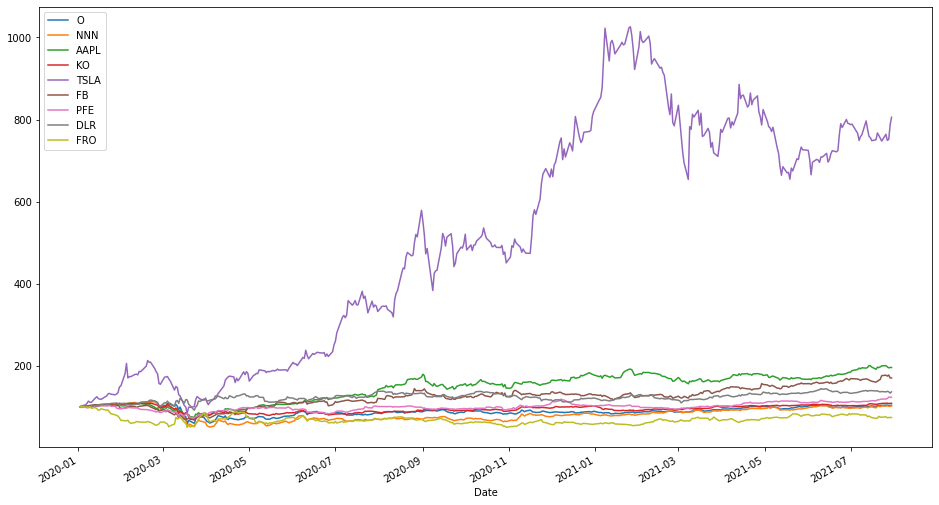

In [14]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [15]:
# neste caso estou colocando valores randomicamente para gerar os  pesos
#weights = np.random.random(len(ativos))
weights = pesos
weights /= np.sum(weights)
weights


array([0.1469, 0.1021, 0.101 , 0.1385, 0.1157, 0.2484, 0.0702, 0.0534,
       0.0238])

In [16]:
portofolio_1 = str(round(np.dot(avg_returns_a, weights),5) *100) + ' %'
print(portofolio_1) 


42.342999999999996 %


<AxesSubplot:>

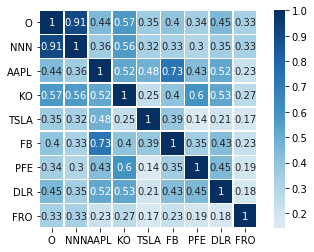

In [19]:
sns.heatmap(returns.corr(),  cmap='RdBu', center=0, square=True, linewidths=.5,annot=True  )

In [20]:
returns.corr()

,O,NNN,AAPL,KO,TSLA,FB,PFE,DLR,FRO
O,1.000000,0.905123,0.442098,0.574652,0.354344,0.403502,0.343126,0.451853,0.334220
NNN,0.905123,1.000000,0.355940,0.562986,0.324401,0.326975,0.304064,0.352615,0.334449
AAPL,0.442098,0.355940,1.000000,0.522032,0.480380,0.729574,0.432322,0.516633,0.225821
KO,0.574652,0.562986,0.522032,1.000000,0.249465,0.404517,0.596571,0.525402,0.269411
TSLA,0.354344,0.324401,0.480380,0.249465,1.000000,0.389011,0.143127,0.213202,0.168158
FB,0.403502,0.326975,0.729574,0.404517,0.389011,1.000000,0.346627,0.432109,0.232262
PFE,0.343126,0.304064,0.432322,0.596571,0.143127,0.346627,1.000000,0.452242,0.192984
DLR,0.451853,0.352615,0.516633,0.525402,0.213202,0.432109,0.452242,1.000000,0.175850
FRO,0.334220,0.334449,0.225821,0.269411,0.168158,0.232262,0.192984,0.175850,1.000000


In [18]:
ativos_qtd 

{'O': 6,
 'NNN': 6,
 'AAPL': 2,
 'KO': 7,
 'TSLA': 0.4812,
 'FB': 2,
 'PFE': 4.71198672,
 'DLR': 1,
 'FRO': 8.632}